# Machine Learning Final Project
# Hayden Johnson and Nic Carpino

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, recall_score, precision_score
import graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_array, check_random_state
import numbers
from sklearn.utils import shuffle as shuffle_
import matplotlib as mpl
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
from sklearn.svm import LinearSVC
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("Official Tournament Game Data.csv")
df

,YEAR,SEED,TEAM,TEAM ROUND,CURRENT ROUND,KENPOM ADJUSTED EFFICIENCY,KENPOM ADJUSTED OFFENSE,KENPOM ADJUSTED DEFENSE,KENPOM ADJUSTED TEMPO,BARTTORVIK ADJUSTED EFFICIENCY,...,OP D REB %,BLOCKED %,TURNOVER % DEFENSE,WINS ABOVE BUBBLE,WIN %,POINTS PER POSSESSION OFFENSE,POINTS PER POSSESSION DEFENSE,SCORE,ID,TEAM.1
0,2022,1,Gonzaga,16,64,33.0000,121.800,88.8000,72.5000,31.800,...,71.0,6.6,17.0,6.7,89.660000,1.190,0.885,93,1,Gonzaga
1,2022,16,Georgia St.,64,64,1.8000,101.500,99.7000,67.1000,1.400,...,67.2,8.9,22.7,-5.2,60.000000,0.993,0.978,72,2,Georgia St.
2,2022,8,Boise St.,64,64,16.4000,108.400,92.0000,64.6000,15.200,...,69.4,8.9,20.1,3.5,78.790000,1.038,0.928,53,3,Boise St.
3,2022,9,Memphis,32,64,16.2000,110.400,94.1000,70.3000,17.500,...,62.5,9.1,20.9,1.4,67.740000,1.056,0.957,64,4,Memphis
4,2022,5,Connecticut,64,64,19.3000,113.900,94.6000,64.9000,18.600,...,62.0,8.3,18.0,3.2,71.880000,1.099,0.953,63,5,Connecticut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,2023,5,Duke,0,0,18.4977,113.326,94.8285,65.2166,18.507,...,63.8,9.6,16.6,4.3,76.470588,1.100,0.970,0,0,Duke
1906,2023,1,Houston,0,0,29.8743,118.854,88.9798,63.3827,28.290,...,62.9,6.6,22.0,8.4,91.176471,1.158,0.872,0,0,Houston
1907,2023,5,Miami FL,0,0,14.9150,118.327,103.4120,68.8077,15.664,...,68.0,8.4,18.1,3.4,78.125000,1.147,1.042,0,0,Miami FL
1908,2023,1,Kansas,0,0,23.1345,114.703,91.5684,69.2256,21.359,...,71.6,7.3,20.2,10.5,79.411765,1.062,0.963,0,0,Kansas


**Unneccesary Column**

In [3]:
df = df.drop('TEAM.1', axis=1)
df

,YEAR,SEED,TEAM,TEAM ROUND,CURRENT ROUND,KENPOM ADJUSTED EFFICIENCY,KENPOM ADJUSTED OFFENSE,KENPOM ADJUSTED DEFENSE,KENPOM ADJUSTED TEMPO,BARTTORVIK ADJUSTED EFFICIENCY,...,OP O REB %,OP D REB %,BLOCKED %,TURNOVER % DEFENSE,WINS ABOVE BUBBLE,WIN %,POINTS PER POSSESSION OFFENSE,POINTS PER POSSESSION DEFENSE,SCORE,ID
0,2022,1,Gonzaga,16,64,33.0000,121.800,88.8000,72.5000,31.800,...,23.0,71.0,6.6,17.0,6.7,89.660000,1.190,0.885,93,1
1,2022,16,Georgia St.,64,64,1.8000,101.500,99.7000,67.1000,1.400,...,30.7,67.2,8.9,22.7,-5.2,60.000000,0.993,0.978,72,2
2,2022,8,Boise St.,64,64,16.4000,108.400,92.0000,64.6000,15.200,...,21.9,69.4,8.9,20.1,3.5,78.790000,1.038,0.928,53,3
3,2022,9,Memphis,32,64,16.2000,110.400,94.1000,70.3000,17.500,...,31.0,62.5,9.1,20.9,1.4,67.740000,1.056,0.957,64,4
4,2022,5,Connecticut,64,64,19.3000,113.900,94.6000,64.9000,18.600,...,27.5,62.0,8.3,18.0,3.2,71.880000,1.099,0.953,63,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,2023,5,Duke,0,0,18.4977,113.326,94.8285,65.2166,18.507,...,25.9,63.8,9.6,16.6,4.3,76.470588,1.100,0.970,0,0
1906,2023,1,Houston,0,0,29.8743,118.854,88.9798,63.3827,28.290,...,27.4,62.9,6.6,22.0,8.4,91.176471,1.158,0.872,0,0
1907,2023,5,Miami FL,0,0,14.9150,118.327,103.4120,68.8077,15.664,...,29.0,68.0,8.4,18.1,3.4,78.125000,1.147,1.042,0,0
1908,2023,1,Kansas,0,0,23.1345,114.703,91.5684,69.2256,21.359,...,28.3,71.6,7.3,20.2,10.5,79.411765,1.062,0.963,0,0


**Classify Round of 64 Win or Loss**

In [4]:
df.loc[df['TEAM ROUND'] < 64, 'WIN'] = 1
df.loc[df['TEAM ROUND'] == 64, 'WIN'] = 0

In [5]:
df

,YEAR,SEED,TEAM,TEAM ROUND,CURRENT ROUND,KENPOM ADJUSTED EFFICIENCY,KENPOM ADJUSTED OFFENSE,KENPOM ADJUSTED DEFENSE,KENPOM ADJUSTED TEMPO,BARTTORVIK ADJUSTED EFFICIENCY,...,OP D REB %,BLOCKED %,TURNOVER % DEFENSE,WINS ABOVE BUBBLE,WIN %,POINTS PER POSSESSION OFFENSE,POINTS PER POSSESSION DEFENSE,SCORE,ID,WIN
0,2022,1,Gonzaga,16,64,33.0000,121.800,88.8000,72.5000,31.800,...,71.0,6.6,17.0,6.7,89.660000,1.190,0.885,93,1,1.0
1,2022,16,Georgia St.,64,64,1.8000,101.500,99.7000,67.1000,1.400,...,67.2,8.9,22.7,-5.2,60.000000,0.993,0.978,72,2,0.0
2,2022,8,Boise St.,64,64,16.4000,108.400,92.0000,64.6000,15.200,...,69.4,8.9,20.1,3.5,78.790000,1.038,0.928,53,3,0.0
3,2022,9,Memphis,32,64,16.2000,110.400,94.1000,70.3000,17.500,...,62.5,9.1,20.9,1.4,67.740000,1.056,0.957,64,4,1.0
4,2022,5,Connecticut,64,64,19.3000,113.900,94.6000,64.9000,18.600,...,62.0,8.3,18.0,3.2,71.880000,1.099,0.953,63,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,2023,5,Duke,0,0,18.4977,113.326,94.8285,65.2166,18.507,...,63.8,9.6,16.6,4.3,76.470588,1.100,0.970,0,0,1.0
1906,2023,1,Houston,0,0,29.8743,118.854,88.9798,63.3827,28.290,...,62.9,6.6,22.0,8.4,91.176471,1.158,0.872,0,0,1.0
1907,2023,5,Miami FL,0,0,14.9150,118.327,103.4120,68.8077,15.664,...,68.0,8.4,18.1,3.4,78.125000,1.147,1.042,0,0,1.0
1908,2023,1,Kansas,0,0,23.1345,114.703,91.5684,69.2256,21.359,...,71.6,7.3,20.2,10.5,79.411765,1.062,0.963,0,0,1.0


**Convert Team Names to a Number**

In [6]:
# Create a label encoder object
le = LabelEncoder()

# Fit the label encoder to your team names data
le.fit(df['TEAM'])

# Transform the team names to numerical values
df['TEAM'] = le.transform(df['TEAM'])

In [7]:
X_2023 = df.copy()
X_2023 = X_2023[X_2023['YEAR'] == 2023]
X_2023 = X_2023.drop('WIN', axis =1)
X_2023 = X_2023.drop('TEAM ROUND', axis =1)
X_2023 = X_2023.drop_duplicates(subset=['TEAM', 'YEAR'], keep='last')
X_2023 = X_2023.reset_index(drop=True)
X_2023

,YEAR,SEED,TEAM,CURRENT ROUND,KENPOM ADJUSTED EFFICIENCY,KENPOM ADJUSTED OFFENSE,KENPOM ADJUSTED DEFENSE,KENPOM ADJUSTED TEMPO,BARTTORVIK ADJUSTED EFFICIENCY,BARTTORVIK ADJUSTED OFFENSE,...,OP O REB %,OP D REB %,BLOCKED %,TURNOVER % DEFENSE,WINS ABOVE BUBBLE,WIN %,POINTS PER POSSESSION OFFENSE,POINTS PER POSSESSION DEFENSE,SCORE,ID
0,2023,16,193,0,-0.20120,107.4700,107.6710,69.2125,-1.386,106.067,...,27.9,67.5,8.6,20.9,-5.9,65.517241,1.098,1.023,0,0
1,2023,16,179,0,-7.21211,101.0290,108.2410,72.5024,-7.989,100.349,...,27.9,74.7,7.7,19.0,-11.4,51.515152,1.028,1.034,0,0
2,2023,16,194,0,-9.68316,96.6102,106.2930,69.3116,-8.896,96.382,...,27.7,70.7,8.1,18.5,-13.3,37.500000,0.939,1.008,0,0
3,2023,16,50,0,-12.26460,106.2570,118.5220,68.7200,-12.653,105.909,...,28.9,68.6,10.0,21.4,-12.2,53.125000,1.088,1.084,0,0
4,2023,16,138,0,0.52915,103.4340,102.9050,61.9981,0.793,103.114,...,32.8,68.7,7.3,23.2,-6.5,62.500000,1.044,1.005,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2023,5,46,0,18.49770,113.3260,94.8285,65.2166,18.507,112.814,...,25.9,63.8,9.6,16.6,4.3,76.470588,1.100,0.970,0,0
64,2023,1,72,0,29.87430,118.8540,88.9798,63.3827,28.290,118.260,...,27.4,62.9,6.6,22.0,8.4,91.176471,1.158,0.872,0,0
65,2023,5,107,0,14.91500,118.3270,103.4120,68.8077,15.664,118.356,...,29.0,68.0,8.4,18.1,3.4,78.125000,1.147,1.042,0,0
66,2023,1,82,0,23.13450,114.7030,91.5684,69.2256,21.359,113.750,...,28.3,71.6,7.3,20.2,10.5,79.411765,1.062,0.963,0,0


**Only Round of 64**

In [8]:
df = df[df['CURRENT ROUND'] == 64]
df = df.drop('TEAM ROUND', axis =1)
df = df.reset_index(drop=True)
df

,YEAR,SEED,TEAM,CURRENT ROUND,KENPOM ADJUSTED EFFICIENCY,KENPOM ADJUSTED OFFENSE,KENPOM ADJUSTED DEFENSE,KENPOM ADJUSTED TEMPO,BARTTORVIK ADJUSTED EFFICIENCY,BARTTORVIK ADJUSTED OFFENSE,...,OP D REB %,BLOCKED %,TURNOVER % DEFENSE,WINS ABOVE BUBBLE,WIN %,POINTS PER POSSESSION OFFENSE,POINTS PER POSSESSION DEFENSE,SCORE,ID,WIN
0,2022,1,64,64,33.0,121.8,88.8,72.5,31.8,120.2,...,71.0,6.6,17.0,6.7,89.66,1.190,0.885,93,1,1.0
1,2022,16,62,64,1.8,101.5,99.7,67.1,1.4,100.8,...,67.2,8.9,22.7,-5.2,60.00,0.993,0.978,72,2,0.0
2,2022,8,16,64,16.4,108.4,92.0,64.6,15.2,106.9,...,69.4,8.9,20.1,3.5,78.79,1.038,0.928,53,3,0.0
3,2022,9,105,64,16.2,110.4,94.1,70.3,17.5,110.3,...,62.5,9.1,20.9,1.4,67.74,1.056,0.957,64,4,1.0
4,2022,5,37,64,19.3,113.9,94.6,64.9,18.6,113.0,...,62.0,8.3,18.0,3.2,71.88,1.099,0.953,63,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,2008,14,61,64,7.9,104.0,96.1,64.1,8.2,102.6,...,62.5,10.0,19.2,-3.9,50.00,1.003,0.990,61,892,0.0
890,2008,7,227,64,20.1,113.6,93.4,63.1,20.9,113.1,...,65.9,6.7,23.3,2.6,69.70,1.113,0.943,75,893,1.0
891,2008,10,5,64,20.2,116.6,96.3,62.8,20.4,115.1,...,72.0,7.7,19.1,1.5,56.25,1.088,1.015,65,894,0.0
892,2008,2,46,64,27.6,117.4,89.8,71.0,28.4,117.2,...,65.7,11.4,24.9,8.9,84.38,1.127,0.929,71,895,1.0


**Purge Teams From 2023 and Drop Prediction Column**

In [9]:
dfCopy = df.copy()
dfCopy = dfCopy[dfCopy['YEAR'] != 2023]
X = dfCopy.drop('WIN', axis =1)
X = X.reset_index(drop=True)
X

,YEAR,SEED,TEAM,CURRENT ROUND,KENPOM ADJUSTED EFFICIENCY,KENPOM ADJUSTED OFFENSE,KENPOM ADJUSTED DEFENSE,KENPOM ADJUSTED TEMPO,BARTTORVIK ADJUSTED EFFICIENCY,BARTTORVIK ADJUSTED OFFENSE,...,OP O REB %,OP D REB %,BLOCKED %,TURNOVER % DEFENSE,WINS ABOVE BUBBLE,WIN %,POINTS PER POSSESSION OFFENSE,POINTS PER POSSESSION DEFENSE,SCORE,ID
0,2022,1,64,64,33.0,121.8,88.8,72.5,31.8,120.2,...,23.0,71.0,6.6,17.0,6.7,89.66,1.190,0.885,93,1
1,2022,16,62,64,1.8,101.5,99.7,67.1,1.4,100.8,...,30.7,67.2,8.9,22.7,-5.2,60.00,0.993,0.978,72,2
2,2022,8,16,64,16.4,108.4,92.0,64.6,15.2,106.9,...,21.9,69.4,8.9,20.1,3.5,78.79,1.038,0.928,53,3
3,2022,9,105,64,16.2,110.4,94.1,70.3,17.5,110.3,...,31.0,62.5,9.1,20.9,1.4,67.74,1.056,0.957,64,4
4,2022,5,37,64,19.3,113.9,94.6,64.9,18.6,113.0,...,27.5,62.0,8.3,18.0,3.2,71.88,1.099,0.953,63,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,2008,14,61,64,7.9,104.0,96.1,64.1,8.2,102.6,...,31.9,62.5,10.0,19.2,-3.9,50.00,1.003,0.990,61,892
890,2008,7,227,64,20.1,113.6,93.4,63.1,20.9,113.1,...,31.4,65.9,6.7,23.3,2.6,69.70,1.113,0.943,75,893
891,2008,10,5,64,20.2,116.6,96.3,62.8,20.4,115.1,...,33.6,72.0,7.7,19.1,1.5,56.25,1.088,1.015,65,894
892,2008,2,46,64,27.6,117.4,89.8,71.0,28.4,117.2,...,33.5,65.7,11.4,24.9,8.9,84.38,1.127,0.929,71,895


In [10]:
X['YEAR'].unique()

array([2022, 2021, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008])

**Create a Dataframe For Prediction**

In [11]:
Y = dfCopy['WIN']
Y = Y.reset_index(drop=True)
Y

0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
889    0.0
890    1.0
891    0.0
892    1.0
893    0.0
Name: WIN, Length: 894, dtype: float64

**Split and Scale Data**

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the training and testing sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
y_train.value_counts()

0.0    360
1.0    355
Name: WIN, dtype: int64

# Decision Tree No Scale

In [14]:
model = DecisionTreeClassifier()
params = [{'criterion':["gini","entropy"],"max_depth":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],"class_weight":["balanced"]}]
GSCV = GridSearchCV(model,params,scoring="roc_auc")
GSCV.fit(X_train,y_train)
GSCV.best_params_
best_model = GSCV.best_estimator_

In [15]:
preds = best_model.predict_proba(X_train)[:,1]

fpr, tpr, thresholds = roc_curve(y_train, best_model.predict_proba(X_train)[:,1])
optimal_idx = np.argmax(tpr - fpr)
best_threshold_dt_no_scale = thresholds[optimal_idx]

# Get the predicted probabilities for the test set
test_preds = best_model.predict_proba(X_test)[:, 1]

# Apply the optimal threshold to the predicted probabilities
best_y_pred_dt_no_scale = (test_preds >= best_threshold_dt_no_scale).astype(int)

# Compute the MSE
mse = mean_squared_error(y_test, best_y_pred_dt_no_scale)

#Accuracy
highest_accuracy_dt_no_scale = accuracy_score(y_test, best_y_pred_dt_no_scale)

# Print the best threshold, the highest accuracy, and the MSE
print("Best Threshold Decision Tree No Scale:", best_threshold_dt_no_scale)
print("Highest Accuracy Decision Tree No Scale:", highest_accuracy_dt_no_scale)
print("MSE Decision Tree No Scale:", mse)

Best Threshold Decision Tree No Scale: 0.7231478199220132
Highest Accuracy Decision Tree No Scale: 0.8100558659217877
MSE Decision Tree No Scale: 0.18994413407821228


In [16]:
team_names = le.inverse_transform(X_test['TEAM'])
team_rounds_with_names = list(zip(team_names, best_y_pred_dt_no_scale, y_test))
dtNonScaled64 = pd.DataFrame(team_rounds_with_names, columns=['Team', 'Predicted Win', 'Actual Win'])
dtNonScaled64['Year'] = X_test['YEAR'].values

print(dtNonScaled64)

              Team  Predicted Win  Actual Win  Year
0    San Diego St.              0         0.0  2010
1         Iowa St.              1         0.0  2015
2           Albany              0         0.0  2013
3           Butler              1         1.0  2010
4      Chattanooga              0         0.0  2022
..             ...            ...         ...   ...
174     St. John's              0         0.0  2015
175        Gonzaga              1         1.0  2009
176  Virginia Tech              0         0.0  2022
177    Florida St.              1         1.0  2021
178     Texas Tech              1         1.0  2022

[179 rows x 4 columns]


In [17]:
dtNonScaled64['Predicted Win'].value_counts()

0    103
1     76
Name: Predicted Win, dtype: int64

**Confusion Matrix Decision Tree No Scale**

In [18]:
# Get the predicted classes for the test set
y_pred = best_model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, best_y_pred_dt_no_scale)

# Calculate the accuracy
accuracy = accuracy_score(y_test, best_y_pred_dt_no_scale)

# Calculate the recall
recall = recall_score(y_test, best_y_pred_dt_no_scale)

# Calculate the precision
precision = precision_score(y_test, best_y_pred_dt_no_scale)

# Print the accuracy, recall, and precision
print("Accuracy Decision Tree Non-Scaled:", accuracy)
print("Recall Decision Tree No-Scaled:", recall)
print("Precision Decision Tree No-Scaled:", precision)

# Print the confusion matrix
print(cm)

Accuracy Decision Tree Non-Scaled: 0.8100558659217877
Recall Decision Tree No-Scaled: 0.7282608695652174
Precision Decision Tree No-Scaled: 0.881578947368421
[[78  9]
 [25 67]]


**Decision Tree No Scale Plot**

[Text(0.5, 0.875, 'BARTTORVIK ADJUSTED EFFICIENCY <= 20.55\nentropy = 1.0\nsamples = 715\nvalue = [357.5, 357.5]'),
 Text(0.25, 0.625, 'KENPOM ADJUSTED EFFICIENCY <= 6.75\nentropy = 0.939\nsamples = 517\nvalue = [332.674, 183.282]'),
 Text(0.125, 0.375, 'SCORE <= 69.5\nentropy = 0.279\nsamples = 126\nvalue = [119.167, 6.042]'),
 Text(0.0625, 0.125, 'entropy = 0.082\nsamples = 99\nvalue = [97.319, 1.007]'),
 Text(0.1875, 0.125, 'entropy = 0.696\nsamples = 27\nvalue = [21.847, 5.035]'),
 Text(0.375, 0.375, 'SCORE <= 74.5\nentropy = 0.994\nsamples = 391\nvalue = [213.507, 177.239]'),
 Text(0.3125, 0.125, 'entropy = 0.921\nsamples = 273\nvalue = [180.736, 91.641]'),
 Text(0.4375, 0.125, 'entropy = 0.851\nsamples = 118\nvalue = [32.771, 85.599]'),
 Text(0.75, 0.625, 'SCORE <= 63.5\nentropy = 0.543\nsamples = 198\nvalue = [24.826, 174.218]'),
 Text(0.625, 0.375, 'BLOCK % <= 9.85\nentropy = 0.999\nsamples = 23\nvalue = [11.917, 11.077]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 7\nvalu

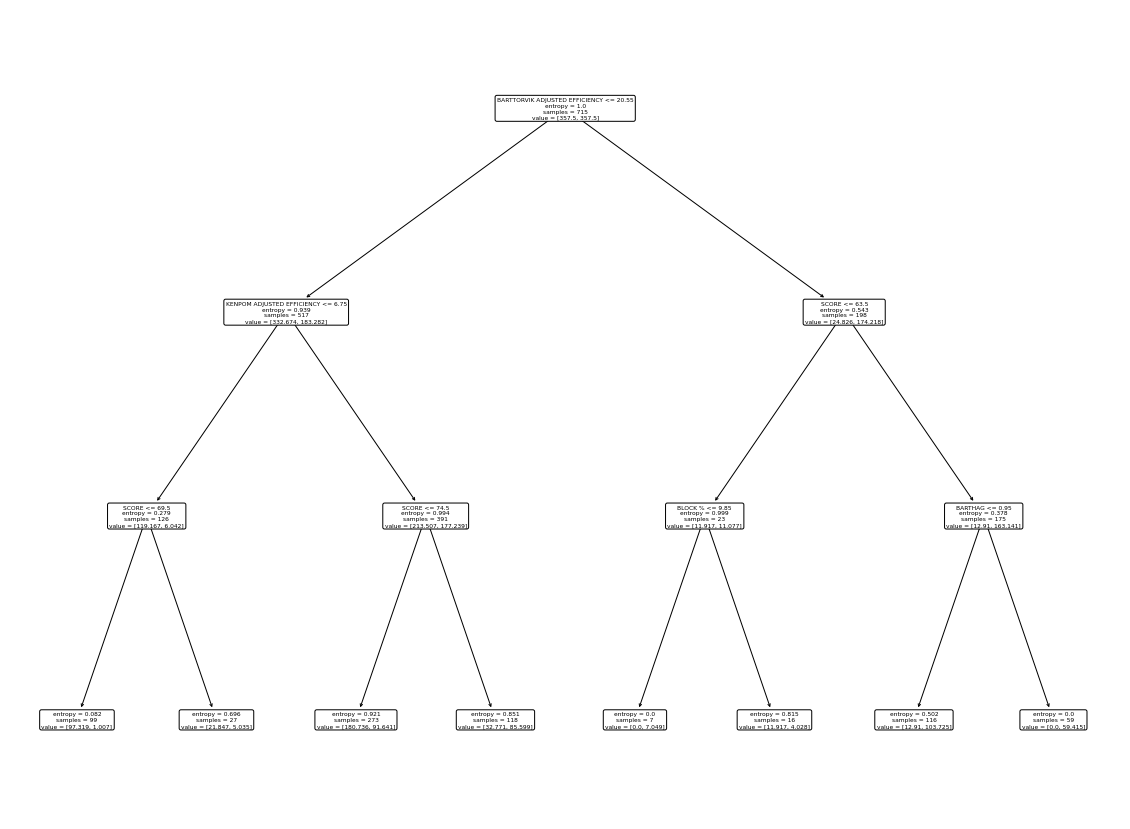

In [19]:
plt.figure(figsize = (20,15))
tree.plot_tree(best_model, rounded= True, feature_names = X.columns)

**Feature Importances No Scale Decision Tree No Scale**

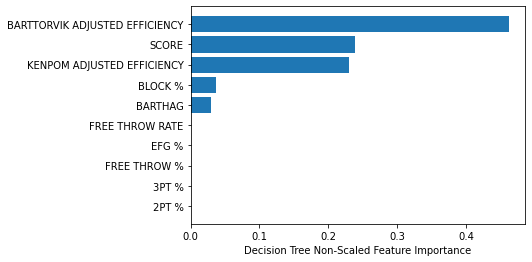

In [20]:
# Plot the feature importances
feature_importances = best_model.feature_importances_
features = list(X_train.columns)
sorted_idx = feature_importances.argsort()[-10:]
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(features)[sorted_idx])
plt.xlabel("Decision Tree Non-Scaled Feature Importance")
plt.show()

**ROC Curve and AUC Decision Tree Scale**

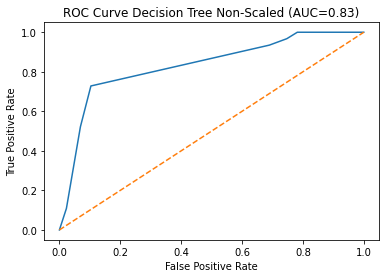

In [21]:
# Get the predicted probabilities for the test set
test_preds = best_model.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds for the test set
fpr, tpr, thresholds = roc_curve(y_test, test_preds)

# Compute the AUC for the test set
auc = roc_auc_score(y_test, test_preds)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Decision Tree Non-Scaled (AUC={:.2f})'.format(auc))
plt.show()


**Predict 2023 Teams Decision Tree Scale**

In [98]:
nonScaledDt = best_model.predict_proba(X_2023)
# Apply the best threshold to convert the predicted probabilities to predicted class labels
nonScaledDt = (nonScaledDt[:, 1] >= .89).astype(int)

/Users/haydenjohnson00/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [99]:
# print the predicted round for each team
team_names = le.inverse_transform(X_2023['TEAM'])
team_rounds_with_names = list(zip(team_names, nonScaledDt))
prediction = pd.DataFrame(team_rounds_with_names, columns=["Team Name", "Win"])
prediction = prediction.drop_duplicates(subset=['Team Name'])
# display the DataFrame
print(prediction)

                 Team Name  Win
0   Texas A&M Corpus Chris    0
1   Southeast Missouri St.    0
2           Texas Southern    0
3      Fairleigh Dickinson    0
4        Northern Kentucky    0
..                     ...  ...
63                    Duke    0
64                 Houston    1
65                Miami FL    0
66                  Kansas    0
67            Saint Mary's    1

[68 rows x 2 columns]


In [100]:
prediction['Win'].value_counts()

0    57
1    11
Name: Win, dtype: int64

In [25]:
winners = prediction[prediction['Win'] == 1]
winners

,Team Name,Win
34,Arizona,1
36,Marquette,1
42,Creighton,1
46,Baylor,1
54,Gonzaga,1
62,Purdue,1


# DT Scaled Data

In [26]:
# Fit a decision tree on the scaled data
model = DecisionTreeClassifier()
params = [{'criterion':["gini","entropy"],"max_depth":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],"class_weight":["balanced"]}]
GSCV = GridSearchCV(model,params,scoring="roc_auc")
GSCV.fit(X_train_scaled,y_train)

# Get the best model from the grid search
best_model = GSCV.best_estimator_

In [27]:
# Find the best threshold based on the ROC curve on the training data
fpr, tpr, thresholds = roc_curve(y_train, best_model.predict_proba(X_train_scaled)[:,1])
optimal_idx = np.argmax(tpr - fpr)
best_threshold_dt_scale = thresholds[optimal_idx]

# Get the predicted probabilities for the test set
test_preds = best_model.predict_proba(X_test_scaled)[:, 1]

# Apply the optimal threshold to the predicted probabilities
best_y_pred_dt_scale = (test_preds >= best_threshold_dt_scale).astype(int)

# Compute the MSE
mse = mean_squared_error(y_test, best_y_pred_dt_scale)

# Compute the accuracy
highest_accuracy_dt_scale = accuracy_score(y_test, best_y_pred_dt_scale)

# Print the best threshold, the highest accuracy, and the MSE
print("Best Threshold Decision Tree Scaled:", best_threshold_dt_scale)
print("Highest Accuracy Decision Tree Scaled:", highest_accuracy_dt_scale)
print("MSE Decision Tree Scaled:", mse)

Best Threshold Decision Tree Scaled: 0.7231478199220132
Highest Accuracy Decision Tree Scaled: 0.8100558659217877
MSE Decision Tree Scaled: 0.18994413407821228


In [28]:
team_names = le.inverse_transform(X_test['TEAM'])
team_rounds_with_names = list(zip(team_names, best_y_pred_dt_scale, y_test))
dtScaled64 = pd.DataFrame(team_rounds_with_names, columns=['Team', 'Predicted Win', 'Actual Win'])
dtScaled64['Year'] = X_test['YEAR'].values

print(dtScaled64)

              Team  Predicted Win  Actual Win  Year
0    San Diego St.              0         0.0  2010
1         Iowa St.              1         0.0  2015
2           Albany              0         0.0  2013
3           Butler              1         1.0  2010
4      Chattanooga              0         0.0  2022
..             ...            ...         ...   ...
174     St. John's              0         0.0  2015
175        Gonzaga              1         1.0  2009
176  Virginia Tech              0         0.0  2022
177    Florida St.              1         1.0  2021
178     Texas Tech              1         1.0  2022

[179 rows x 4 columns]


In [29]:
dtScaled64['Predicted Win'].value_counts()

0    103
1     76
Name: Predicted Win, dtype: int64

**Confusion Matrix Decision Tree Scale**

In [30]:
# Get the predicted classes for the test set
y_pred = best_model.predict(X_test_scaled)

# Create the confusion matrix
cm = confusion_matrix(y_test, best_y_pred_dt_scale)

# Calculate the accuracy
accuracy = accuracy_score(y_test, best_y_pred_dt_scale)

# Calculate the recall
recall = recall_score(y_test, best_y_pred_dt_scale)

# Calculate the precision
precision = precision_score(y_test, best_y_pred_dt_scale)

# Print the accuracy, recall, and precision
print("Accuracy Decision Tree Scaled:", accuracy)
print("Recall Decision Tree Scaled:", recall)
print("Precision Decision Tree Scaled:", precision)

# Print the confusion matrix
print(cm)

Accuracy Decision Tree Scaled: 0.8100558659217877
Recall Decision Tree Scaled: 0.7282608695652174
Precision Decision Tree Scaled: 0.881578947368421
[[78  9]
 [25 67]]


**Decision Tree Scale Plot**

[Text(0.5, 0.875, 'BARTTORVIK ADJUSTED EFFICIENCY <= 0.601\nentropy = 1.0\nsamples = 715\nvalue = [357.5, 357.5]'),
 Text(0.25, 0.625, 'KENPOM ADJUSTED EFFICIENCY <= -1.022\nentropy = 0.939\nsamples = 517\nvalue = [332.674, 183.282]'),
 Text(0.125, 0.375, 'SCORE <= 0.014\nentropy = 0.279\nsamples = 126\nvalue = [119.167, 6.042]'),
 Text(0.0625, 0.125, 'entropy = 0.082\nsamples = 99\nvalue = [97.319, 1.007]'),
 Text(0.1875, 0.125, 'entropy = 0.696\nsamples = 27\nvalue = [21.847, 5.035]'),
 Text(0.375, 0.375, 'SCORE <= 0.422\nentropy = 0.994\nsamples = 391\nvalue = [213.507, 177.239]'),
 Text(0.3125, 0.125, 'entropy = 0.921\nsamples = 273\nvalue = [180.736, 91.641]'),
 Text(0.4375, 0.125, 'entropy = 0.851\nsamples = 118\nvalue = [32.771, 85.599]'),
 Text(0.75, 0.625, 'SCORE <= -0.476\nentropy = 0.543\nsamples = 198\nvalue = [24.826, 174.218]'),
 Text(0.625, 0.375, 'BLOCK % <= -0.279\nentropy = 0.999\nsamples = 23\nvalue = [11.917, 11.077]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples =

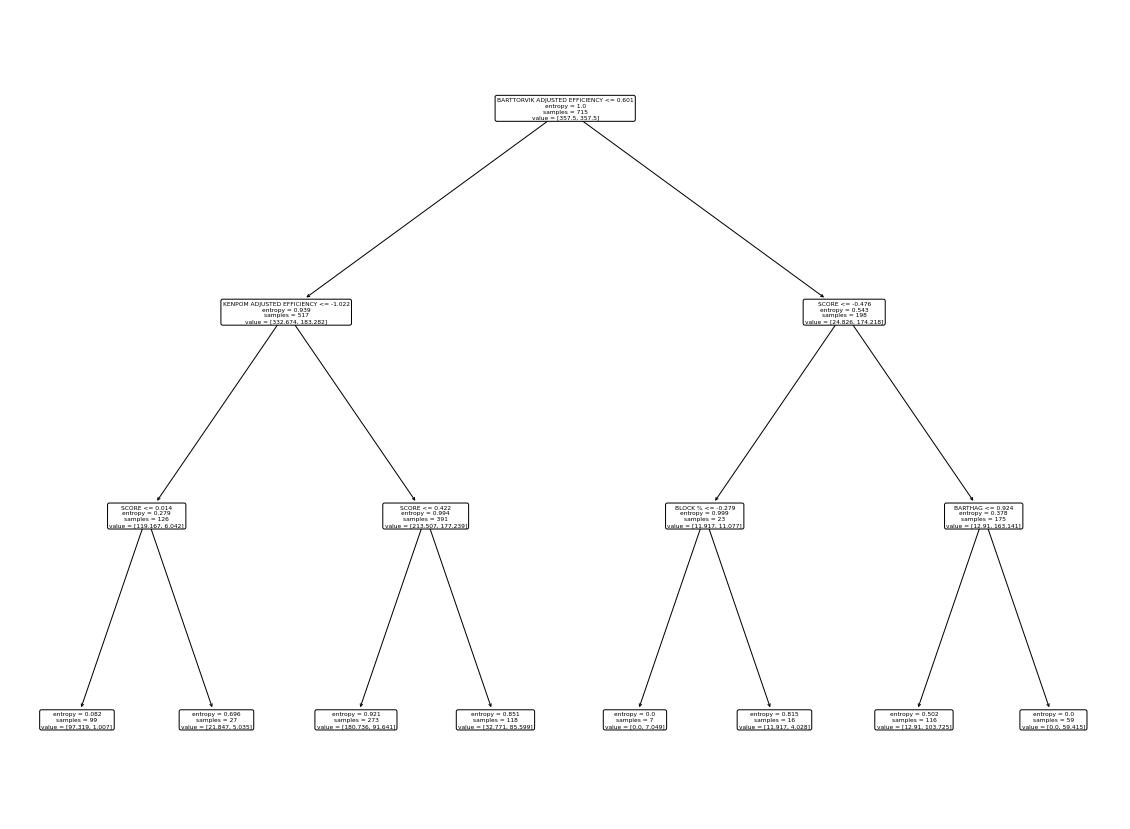

In [31]:
plt.figure(figsize = (20,15))
tree.plot_tree(best_model, rounded= True, feature_names = X.columns)

**Decision Tree Important Features Scale**

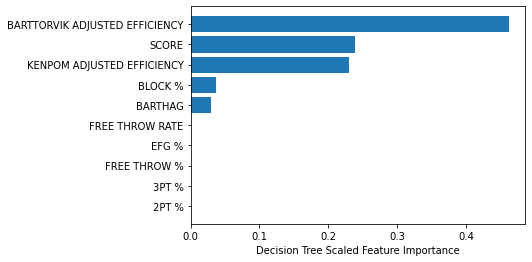

In [32]:
# Plot the feature importances
feature_importances = best_model.feature_importances_
features = list(X_train.columns)
sorted_idx = feature_importances.argsort()[-10:]
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(features)[sorted_idx])
plt.xlabel("Decision Tree Scaled Feature Importance")
plt.show()

**ROC Curve and AUC Decision Tree Scale**

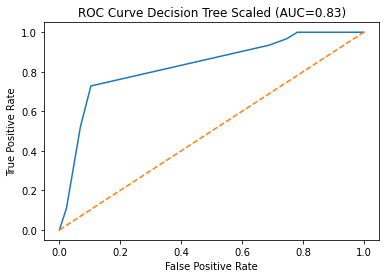

In [33]:
# Get the predicted probabilities for the test set
test_preds = best_model.predict_proba(X_test_scaled)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds for the test set
fpr, tpr, thresholds = roc_curve(y_test, test_preds)

# Compute the AUC for the test set
auc = roc_auc_score(y_test, test_preds)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Decision Tree Scaled (AUC={:.2f})'.format(auc))
plt.show()


**Predict 2023 Teams Decision Tree Scale**

In [86]:
# make predictions for the 2023 teams
bracket_X_scaled = scaler.transform(X_2023)
scaledDt = best_model.predict_proba(bracket_X_scaled)
# Apply the best threshold to convert the predicted probabilities to predicted class labels
scaledDt = (scaledDt[:, 1] >= .34).astype(int)

In [87]:
# print the predicted round for each team
team_names = le.inverse_transform(X_2023['TEAM'])
team_rounds_with_names = list(zip(team_names, scaledDt))
prediction = pd.DataFrame(team_rounds_with_names, columns=["Team Name", "Win"])
prediction = prediction.drop_duplicates(subset=['Team Name'])
# display the DataFrame
print(prediction)

                 Team Name  Win
0   Texas A&M Corpus Chris    0
1   Southeast Missouri St.    0
2           Texas Southern    0
3      Fairleigh Dickinson    0
4        Northern Kentucky    0
..                     ...  ...
63                    Duke    0
64                 Houston    0
65                Miami FL    0
66                  Kansas    0
67            Saint Mary's    0

[68 rows x 2 columns]


In [88]:
prediction['Win'].value_counts()

0    62
1     6
Name: Win, dtype: int64

In [37]:
winners = prediction[prediction['Win'] == 1]
winners

,Team Name,Win
34,Arizona,1
36,Marquette,1
42,Creighton,1
46,Baylor,1
54,Gonzaga,1
62,Purdue,1


# Random Forest Non-Scaled

In [38]:
# Create a random forest classifier
rf = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 5, 10, 20],
    'max_features': ['sqrt', 'log2']
}

# Use GridSearchCV to search for the best hyperparameters
rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X_train, y_train)

GSCV.best_params_
# Get the best model
best_rf = rf_cv.best_estimator_

In [39]:
preds = best_rf.predict_proba(X_train)[:,1]

fpr, tpr, thresholds = roc_curve(y_train, preds)
optimal_idx = np.argmax(tpr - fpr)
best_threshold_rf_no_scale = thresholds[optimal_idx]

# Get the predicted probabilities for the test set
test_preds = best_model.predict_proba(X_test)[:, 1]

# Apply the optimal threshold to the predicted probabilities
best_y_pred_rf_no_scale = (test_preds >= best_threshold_rf_no_scale).astype(int)

# Compute the MSE
mse = mean_squared_error(y_test, best_y_pred_rf_no_scale)

#Accuracy
highest_accuracy_rf_no_scale = accuracy_score(y_test, best_y_pred_rf_no_scale)

# Print the best threshold, the highest accuracy, and the MSE
print("Best Threshold Random Forest Non-Scaled:", best_threshold_rf_no_scale)
print("Highest Accuracy Random Forest Non-Scaled:", highest_accuracy_rf_no_scale)
print("MSE Random Forest Non-Scaled:", mse)

Best Threshold Random Forest Non-Scaled: 0.64
Highest Accuracy Random Forest Non-Scaled: 0.5418994413407822
MSE Random Forest Non-Scaled: 0.4581005586592179


/Users/haydenjohnson00/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [40]:
team_names = le.inverse_transform(X_test['TEAM'])
team_rounds_with_names = list(zip(team_names, best_y_pred_rf_no_scale, y_test))
round64RfNonScaled = pd.DataFrame(team_rounds_with_names, columns=['Team', 'Predicted Win', 'Actual Win'])
round64RfNonScaled['Year'] = X_test['YEAR'].values

print(round64RfNonScaled)

              Team  Predicted Win  Actual Win  Year
0    San Diego St.              1         0.0  2010
1         Iowa St.              1         0.0  2015
2           Albany              1         0.0  2013
3           Butler              1         1.0  2010
4      Chattanooga              1         0.0  2022
..             ...            ...         ...   ...
174     St. John's              1         0.0  2015
175        Gonzaga              1         1.0  2009
176  Virginia Tech              1         0.0  2022
177    Florida St.              1         1.0  2021
178     Texas Tech              1         1.0  2022

[179 rows x 4 columns]


In [41]:
round64RfNonScaled['Predicted Win'].value_counts()

1    172
0      7
Name: Predicted Win, dtype: int64

**Confusion Matrix Random Forest No Scale**

In [42]:
# Get the predicted classes for the test set
y_pred = best_model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, best_y_pred_rf_no_scale)

# Calculate the accuracy
accuracy = accuracy_score(y_test, best_y_pred_rf_no_scale)

# Calculate the recall
recall = recall_score(y_test, best_y_pred_rf_no_scale)

# Calculate the precision
precision = precision_score(y_test, best_y_pred_rf_no_scale)

# Print the accuracy, recall, and precision
print("Accuracy Random Forest No-Scaled:", accuracy)
print("Recall Random Forest No-Scaled:", recall)
print("Precision Random Forest No-Scaled:", precision)

# Print the confusion matrix
print(cm)

Accuracy Random Forest No-Scaled: 0.5418994413407822
Recall Random Forest No-Scaled: 0.9891304347826086
Precision Random Forest No-Scaled: 0.5290697674418605
[[ 6 81]
 [ 1 91]]


/Users/haydenjohnson00/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


**Feature Importance Random Forest No Scale**

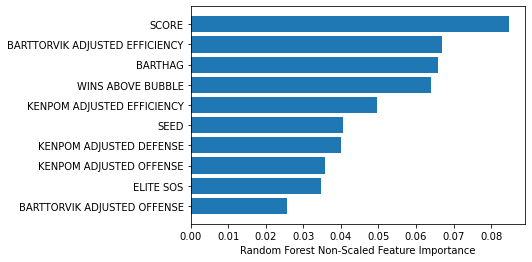

In [43]:
# Plot the feature importances
feature_importances = best_rf.feature_importances_
features = list(X_train.columns)
sorted_idx = feature_importances.argsort()[-10:]
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(features)[sorted_idx])
plt.xlabel("Random Forest Non-Scaled Feature Importance")
plt.show()

**ROC Curve and AUC Random Forest No Scale**

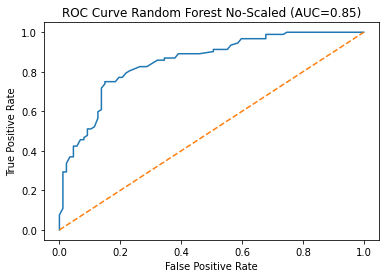

In [44]:
# Get the predicted probabilities for the test set
test_preds = best_rf.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds for the test set
fpr, tpr, thresholds = roc_curve(y_test, test_preds)

# Compute the AUC for the test set
auc = roc_auc_score(y_test, test_preds)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Random Forest No-Scaled (AUC={:.2f})'.format(auc))
plt.show()


**Predict 2023 Teams Random Forest No Scale**

In [63]:
# Make predictions for the 2023 teams using the trained random forest classifier
rfNoScale = best_rf.predict_proba(X_2023)

# Apply the best threshold to convert the predicted probabilities to predicted class labels
rfNoScale = (rfNoScale[:, 1] >= 0.48).astype(int)

/Users/haydenjohnson00/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [64]:
# print the predicted round for each team
team_names = le.inverse_transform(X_2023['TEAM'])
team_rounds_with_names = list(zip(team_names, rfNoScale))
prediction = pd.DataFrame(team_rounds_with_names, columns=["Team Name", "Team Round"])
prediction = prediction.drop_duplicates(subset=['Team Name'])
# display the DataFrame
print(prediction)

                 Team Name  Team Round
0   Texas A&M Corpus Chris           0
1   Southeast Missouri St.           0
2           Texas Southern           0
3      Fairleigh Dickinson           0
4        Northern Kentucky           0
..                     ...         ...
63                    Duke           1
64                 Houston           1
65                Miami FL           1
66                  Kansas           1
67            Saint Mary's           1

[68 rows x 2 columns]


In [65]:
prediction['Team Round'].value_counts()

0    38
1    30
Name: Team Round, dtype: int64

In [66]:
winners = prediction[prediction['Team Round'] == 1]
winners

,Team Name,Team Round
23,Memphis,1
26,West Virginia,1
28,Auburn,1
32,Texas A&M,1
33,Northwestern,1
34,Arizona,1
35,Utah St.,1
36,Marquette,1
37,USC,1
38,Texas,1


# Random Forest Scale

In [49]:
# Create a random forest classifier
rf = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 5, 10, 20],
    'max_features': ['sqrt', 'log2']
}

# Use GridSearchCV to search for the best hyperparameters
rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X_train_scaled, y_train)

# Get the best model
best_rf = rf_cv.best_estimator_

In [50]:
preds = best_rf.predict_proba(X_train_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, preds)
optimal_idx = np.argmax(tpr - fpr)
best_threshold_rf_scale = thresholds[optimal_idx]

# Get the predicted probabilities for the test set
test_preds = best_rf.predict_proba(X_test_scaled)[:, 1]

# Apply the optimal threshold to the predicted probabilities
best_y_pred_rf_scale = (test_preds >= best_threshold_rf_scale).astype(int)

# Compute the MSE
mse = mean_squared_error(y_test, best_y_pred_rf_scale)

#Accuracy
highest_accuracy_rf_scale = accuracy_score(y_test, best_y_pred_rf_scale)

# Print the best threshold, the highest accuracy, and the MSE
print("Best Threshold Random Forest Scaled:", best_threshold_rf_scale)
print("Highest Accuracy Random Forest Scaled:", highest_accuracy_rf_scale)
print("MSE Random Forest Scaled:", mse)

Best Threshold Random Forest Scaled: 0.6333333333333333
Highest Accuracy Random Forest Scaled: 0.770949720670391
MSE Random Forest Scaled: 0.22905027932960895


In [51]:
team_names = le.inverse_transform(X_test['TEAM'])
team_rounds_with_names = list(zip(team_names, best_y_pred_rf_scale, y_test))
round64RfScaled = pd.DataFrame(team_rounds_with_names, columns=['Team', 'Predicted Win', 'Actual Win'])
round64RfScaled['Year'] = X_test['YEAR'].values

print(round64RfScaled)

              Team  Predicted Win  Actual Win  Year
0    San Diego St.              0         0.0  2010
1         Iowa St.              1         0.0  2015
2           Albany              0         0.0  2013
3           Butler              1         1.0  2010
4      Chattanooga              0         0.0  2022
..             ...            ...         ...   ...
174     St. John's              0         0.0  2015
175        Gonzaga              1         1.0  2009
176  Virginia Tech              0         0.0  2022
177    Florida St.              1         1.0  2021
178     Texas Tech              1         1.0  2022

[179 rows x 4 columns]


In [52]:
round64RfScaled['Predicted Win'].value_counts()

0    106
1     73
Name: Predicted Win, dtype: int64

**Confusion Matrix Random Forest Scale**

In [53]:
# Get the predicted classes for the test set
y_pred = best_model.predict(X_test_scaled)

# Create the confusion matrix
cm = confusion_matrix(y_test, best_y_pred_rf_scale)

# Calculate the accuracy
accuracy = accuracy_score(y_test, best_y_pred_rf_scale)

# Calculate the recall
recall = recall_score(y_test, best_y_pred_rf_scale)

# Calculate the precision
precision = precision_score(y_test, best_y_pred_rf_scale)

# Print the accuracy, recall, and precision
print("Accuracy Random Forest Scale:", accuracy)
print("Recall Random Forest Scale:", recall)
print("Precision Random Forest Scale:", precision)

# Print the confusion matrix
print(cm)

Accuracy Random Forest Scale: 0.770949720670391
Recall Random Forest Scale: 0.6739130434782609
Precision Random Forest Scale: 0.8493150684931506
[[76 11]
 [30 62]]


**Feature Importance Random Forest Scale**

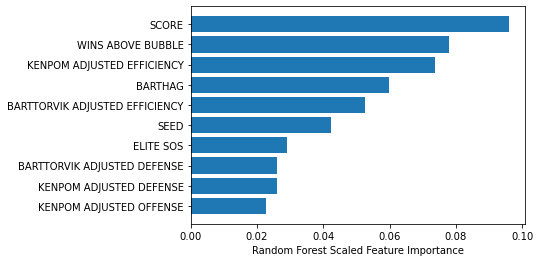

In [54]:
# Plot the feature importances
feature_importances = best_rf.feature_importances_
features = list(X_train.columns)
sorted_idx = feature_importances.argsort()[-10:]
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(features)[sorted_idx])
plt.xlabel("Random Forest Scaled Feature Importance")
plt.show()

**ROC Curve and AUC Random Forest Scale**

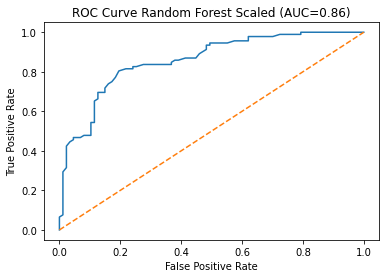

In [55]:
# Get the predicted probabilities for the test set
test_preds = best_rf.predict_proba(X_test_scaled)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds for the test set
fpr, tpr, thresholds = roc_curve(y_test, test_preds)

# Compute the AUC for the test set
auc = roc_auc_score(y_test, test_preds)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Random Forest Scaled (AUC={:.2f})'.format(auc))
plt.show()


**Predict 2023 Teams Random Forest Scale**

In [70]:
rfScale = best_rf.predict_proba(bracket_X_scaled)
# Apply the best threshold to convert the predicted probabilities to predicted class labels
rfScale = (rfScale[:, 1] >= .38).astype(int)

In [71]:
# print the predicted round for each team
team_names = le.inverse_transform(X_2023['TEAM'])
team_rounds_with_names = list(zip(team_names, rfScale))
prediction = pd.DataFrame(team_rounds_with_names, columns=["Team Name", "Team Round"])
prediction = prediction.drop_duplicates(subset=['Team Name'])
# display the DataFrame
print(prediction)

                 Team Name  Team Round
0   Texas A&M Corpus Chris           0
1   Southeast Missouri St.           0
2           Texas Southern           0
3      Fairleigh Dickinson           0
4        Northern Kentucky           0
..                     ...         ...
63                    Duke           1
64                 Houston           1
65                Miami FL           1
66                  Kansas           1
67            Saint Mary's           1

[68 rows x 2 columns]


In [72]:
prediction['Team Round'].value_counts()

0    36
1    32
Name: Team Round, dtype: int64

In [73]:
winners = prediction[prediction['Team Round'] == 1]
winners

,Team Name,Team Round
22,Maryland,1
24,Iowa,1
25,Arkansas,1
26,West Virginia,1
30,Missouri,1
31,Michigan St.,1
32,Texas A&M,1
33,Northwestern,1
34,Arizona,1
36,Marquette,1
